In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", context="paper")

In [37]:
# backtest_odds = pd.read_csv("../../data/backtesting/backtest_odds.csv")
# backtest_actual = pd.read_csv("../../model_files/lr/backtest_actual_simultaneous_0.1.csv")
# backtest_mc = pd.read_csv("../../model_files/lr/backtest_mc_simultaneous_0.1.csv")

backtest_odds = pd.read_csv("../../data/backtesting/backtest_odds_case_study.csv")
backtest_actual = pd.read_csv("../../model_files/lr/case_study/backtest_actual_simultaneous_0.25.csv")
backtest_mc = pd.read_csv("../../model_files/lr/case_study/backtest_mc_simultaneous_0.25.csv")

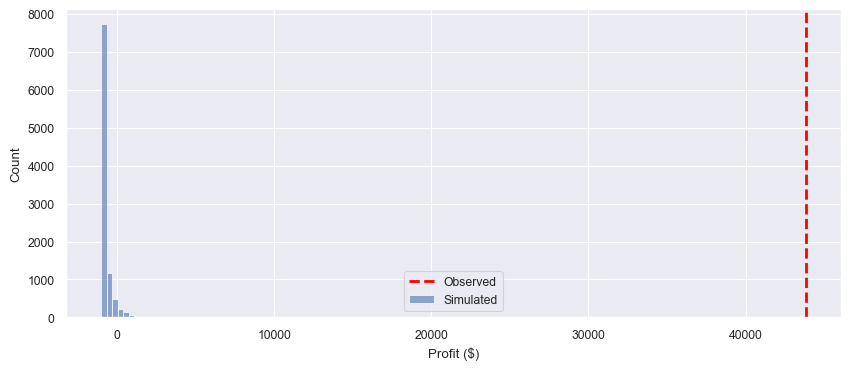

In [38]:
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the figure size as needed
simulated_pnl = backtest_mc.drop(columns=["event_id"]).iloc[-1] - 1000
# simulated_pnl.hist(bins=100, ax=ax)
ax = sns.histplot(
    simulated_pnl,
    bins=100,
    # color="blue",
    ax=ax,
    stat="count",
    label="Simulated",
    alpha=0.6
)
ax.set(xlabel="Profit ($)")

actual_pnl = backtest_actual["bankroll"].iloc[-1] - 1000
ax.axvline(actual_pnl, color='red', linestyle='dashed', linewidth=2, label="Observed")
# ax.axvline(actual_pnl, color='red', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

In [39]:
num_geq = np.count_nonzero(simulated_pnl >= actual_pnl)
p_value = (num_geq + 1) / (len(simulated_pnl) + 1)
adj_p_value = p_value * 12
print(f"p-value: {adj_p_value:.4f}")

p-value: 0.0012


In [40]:
print(f"p-value: {p_value:.4f}")

p-value: 0.0001


In [41]:
backtest_actual

,event_id,bankroll,cumulative_bets,cumulative_wagered,cumulative_return
0,46effbd1135423c5,946.49,3,53.51,0.00
1,4512e46543b960ad,988.32,5,116.23,104.55
2,6a8a06b542e1516d,916.56,8,204.46,121.02
3,865aa315ea62c511,845.48,15,286.12,131.60
4,b4ad3a06ee4d660c,844.17,16,287.43,131.60
...,...,...,...,...,...
326,585f9ffdb0cd0466,47024.77,961,374614.20,420638.97
327,daff32bc96d1eabf,58099.84,963,381754.00,438853.84
328,e955046551f8c7dd,54678.37,965,385175.47,438853.84
329,ad23903ef3af7406,50883.22,971,389844.88,439728.10


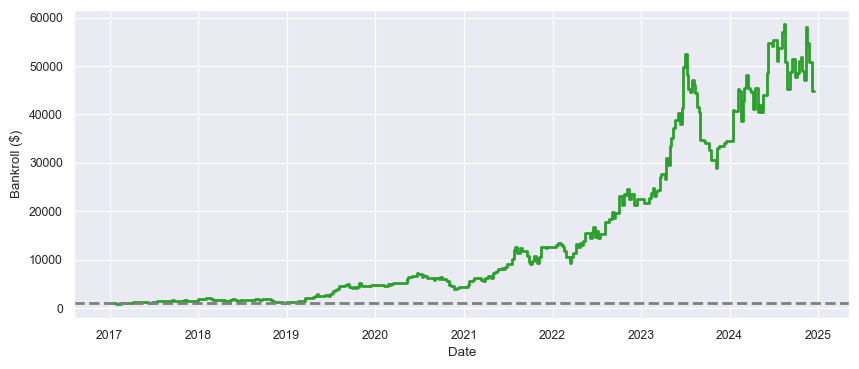

In [42]:
temp = backtest_odds[["event_id", "date"]]
temp = temp.drop_duplicates()

dates = [pd.to_datetime("2017-01-01")]
bankroll = [1000]  # Initial bankroll

dates += pd.to_datetime(temp["date"]).tolist()
bankroll += backtest_actual["bankroll"].tolist()

fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.lineplot(
    x=dates,
    y=bankroll,
    ax=ax,
    # label="Observed Bankroll",
    color="#2ca02c",
    # marker="o",
    linewidth=2,
    drawstyle="steps-pre"
)
ax.set(xlabel="Date", ylabel="Bankroll ($)")
ax.axhline(1000, color="gray", linestyle="--", linewidth=2)
plt.show()

In [43]:
# actual_pnl
np.round(actual_pnl, 2)

43830.51

In [44]:
bet_yield = (backtest_actual["cumulative_return"].iloc[-1] - backtest_actual["cumulative_wagered"].iloc[-1]) / backtest_actual["cumulative_wagered"].iloc[-1] * 100
print(f"Bet Yield: {bet_yield:.2f}%")

Bet Yield: 11.07%


In [45]:
def calculate_max_drawdown(values):
    """
    Calculate the maximum drawdown from a list of values.
    
    Args:
        values (list): A list of numeric values (typically prices or portfolio values)
        
    Returns:
        float: The maximum drawdown as a percentage (0 to 1)
    """
    # Handle empty list or list with only one value
    if len(values) <= 1:
        return 0.0
    
    max_so_far = values[0]
    max_drawdown = 0.0
    
    for value in values:
        # Update maximum value seen so far
        if value > max_so_far:
            max_so_far = value
        
        # Calculate current drawdown
        current_drawdown = (max_so_far - value) / max_so_far if max_so_far > 0 else 0
        
        # Update maximum drawdown if current drawdown is greater
        max_drawdown = max(max_drawdown, current_drawdown)
    
    return max_drawdown

calculate_max_drawdown(backtest_actual["bankroll"].values) * 100  # Convert to percentage

46.47461381190368